# Importing Libraries

In [20]:
import math
from random import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
import numpy as np
from sklearn.model_selection import train_test_split
import librosa, librosa.display
import matplotlib.pyplot as plt

import os
import json
import librosa
import pandas as pd

# Librosa for feature extraction of one audio file

In [15]:
file="C:\\Users\\hnsik\\Downloads\\archive\\Data\\genres_original\\blues\\blues.00000.wav"

In [19]:
signal,sr=librosa.load(file, sr=22050)

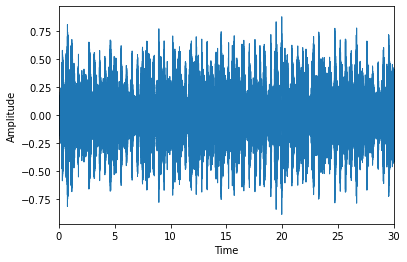

In [20]:
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

[-39.49905396-7.46069873e-14j -18.64591868+3.67946888e-01j
 -18.55041851+7.65147152e-02j ... -18.52902335+3.12934891e-02j
 -18.55041851-7.65147152e-02j -18.64591868-3.67946888e-01j]


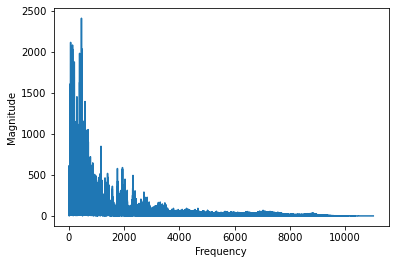

In [27]:
fft=np.fft.fft(signal)
print(fft)
magnitude=np.abs(fft)
frequency=np.linspace(0,sr,len(magnitude))
lmag=magnitude[:int(len(frequency)/2)]
lfreq=frequency[:int(len(frequency)/2)]
plt.plot(lfreq, lmag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

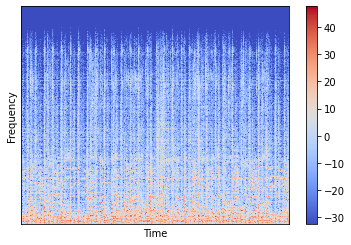

In [31]:
numbfft=2048
hop=512
stft=librosa.core.stft(signal,hop_length=hop,n_fft=numbfft)
spectrogram=np.abs(stft)
log_spect=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spect,sr=sr,hop_length=hop)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


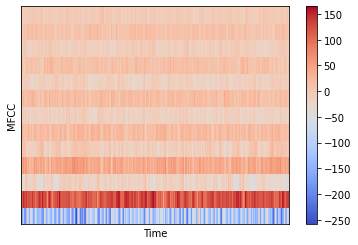

In [32]:
mfccs=librosa.feature.mfcc(signal,n_fft=numbfft, hop_length=hop, n_mfcc=13)
librosa.display.specshow(mfccs,sr=sr,hop_length=hop)

plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

# Mfcc extraction for dataset audio files

In [2]:
path="genres"
json_path="data.json"

In [8]:
sample_rate=22050
duration=30

In [9]:
samples_per_track= sample_rate * duration


In [10]:
def save(path,json_path,n_mfcc=13,n_fft=2048,hop_length=512,num_segments=5):
    
    #build dictionary to store data
    data={
        "mapping":[], #this is the genre list
         "mfcc":[], #inputs
          "labels":[] #targets
    }
    
    num_samples_per_segment=int(samples_per_track/num_segments)
    expected_mfccv_per_segments=math.ceil(num_samples_per_segment/hop_length)
    
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(path)):
        if dirpath is not path: #check only when the dirpath is not equal to the root directory
        
            dirpathComps=dirpath.split("\\")
            semanticlabel=dirpathComps[-1]
            #this makes sure that if you get genre/blues it splits it and display "blues"
        
            data["mapping"].append(semanticlabel)
            #this appends the labels that you get into the mapping data 
            
            print("\nProcessing {}".format(semanticlabel))
            
            for f in filenames:
                file_path= os.path.join(dirpath,f)
                #this gets all the audio files in the directory
                signal,sr=librosa.load(file_path,sr=sample_rate)
                
                for s in range(num_segments):
                    
                    start=num_samples_per_segment * s
                    finish= start + num_samples_per_segment
                    
                    #for the song it divides it into the number of segments mentioned to increase dataset range
                    
                    
                    mfcc= librosa.feature.mfcc(signal[start:finish],sr=sr,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length)
                    mfcc=mfcc.T
                    #mfcc for each of these segments is calculated
                    
                    if len(mfcc) ==  expected_mfccv_per_segments:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        #labels and mfcc are saved into the data mao
                        print("{}, segment:{}".format(file_path, s))
                        
    with open(json_path,"w") as fp:
        json.dump(data,fp,indent=4)
        #this saves the data map into a json file
            
        
        
        
    

In [6]:
save(path,json_path,num_segments=5)


Processing blues
genres\blues\blues.00000.wav, segment:0
genres\blues\blues.00000.wav, segment:1
genres\blues\blues.00000.wav, segment:2
genres\blues\blues.00000.wav, segment:3
genres\blues\blues.00000.wav, segment:4
genres\blues\blues.00001.wav, segment:0
genres\blues\blues.00001.wav, segment:1
genres\blues\blues.00001.wav, segment:2
genres\blues\blues.00001.wav, segment:3
genres\blues\blues.00001.wav, segment:4
genres\blues\blues.00002.wav, segment:0
genres\blues\blues.00002.wav, segment:1
genres\blues\blues.00002.wav, segment:2
genres\blues\blues.00002.wav, segment:3
genres\blues\blues.00002.wav, segment:4
genres\blues\blues.00003.wav, segment:0
genres\blues\blues.00003.wav, segment:1
genres\blues\blues.00003.wav, segment:2
genres\blues\blues.00003.wav, segment:3
genres\blues\blues.00003.wav, segment:4
genres\blues\blues.00004.wav, segment:0
genres\blues\blues.00004.wav, segment:1
genres\blues\blues.00004.wav, segment:2
genres\blues\blues.00004.wav, segment:3
genres\blues\blues.000

genres\blues\blues.00041.wav, segment:1
genres\blues\blues.00041.wav, segment:2
genres\blues\blues.00041.wav, segment:3
genres\blues\blues.00041.wav, segment:4
genres\blues\blues.00042.wav, segment:0
genres\blues\blues.00042.wav, segment:1
genres\blues\blues.00042.wav, segment:2
genres\blues\blues.00042.wav, segment:3
genres\blues\blues.00042.wav, segment:4
genres\blues\blues.00043.wav, segment:0
genres\blues\blues.00043.wav, segment:1
genres\blues\blues.00043.wav, segment:2
genres\blues\blues.00043.wav, segment:3
genres\blues\blues.00043.wav, segment:4
genres\blues\blues.00044.wav, segment:0
genres\blues\blues.00044.wav, segment:1
genres\blues\blues.00044.wav, segment:2
genres\blues\blues.00044.wav, segment:3
genres\blues\blues.00044.wav, segment:4
genres\blues\blues.00045.wav, segment:0
genres\blues\blues.00045.wav, segment:1
genres\blues\blues.00045.wav, segment:2
genres\blues\blues.00045.wav, segment:3
genres\blues\blues.00045.wav, segment:4
genres\blues\blues.00046.wav, segment:0


genres\blues\blues.00082.wav, segment:3
genres\blues\blues.00082.wav, segment:4
genres\blues\blues.00083.wav, segment:0
genres\blues\blues.00083.wav, segment:1
genres\blues\blues.00083.wav, segment:2
genres\blues\blues.00083.wav, segment:3
genres\blues\blues.00083.wav, segment:4
genres\blues\blues.00084.wav, segment:0
genres\blues\blues.00084.wav, segment:1
genres\blues\blues.00084.wav, segment:2
genres\blues\blues.00084.wav, segment:3
genres\blues\blues.00084.wav, segment:4
genres\blues\blues.00085.wav, segment:0
genres\blues\blues.00085.wav, segment:1
genres\blues\blues.00085.wav, segment:2
genres\blues\blues.00085.wav, segment:3
genres\blues\blues.00085.wav, segment:4
genres\blues\blues.00086.wav, segment:0
genres\blues\blues.00086.wav, segment:1
genres\blues\blues.00086.wav, segment:2
genres\blues\blues.00086.wav, segment:3
genres\blues\blues.00086.wav, segment:4
genres\blues\blues.00087.wav, segment:0
genres\blues\blues.00087.wav, segment:1
genres\blues\blues.00087.wav, segment:2


genres\classical\classical.00019.wav, segment:3
genres\classical\classical.00019.wav, segment:4
genres\classical\classical.00020.wav, segment:0
genres\classical\classical.00020.wav, segment:1
genres\classical\classical.00020.wav, segment:2
genres\classical\classical.00020.wav, segment:3
genres\classical\classical.00020.wav, segment:4
genres\classical\classical.00021.wav, segment:0
genres\classical\classical.00021.wav, segment:1
genres\classical\classical.00021.wav, segment:2
genres\classical\classical.00021.wav, segment:3
genres\classical\classical.00021.wav, segment:4
genres\classical\classical.00022.wav, segment:0
genres\classical\classical.00022.wav, segment:1
genres\classical\classical.00022.wav, segment:2
genres\classical\classical.00022.wav, segment:3
genres\classical\classical.00022.wav, segment:4
genres\classical\classical.00023.wav, segment:0
genres\classical\classical.00023.wav, segment:1
genres\classical\classical.00023.wav, segment:2
genres\classical\classical.00023.wav, se

genres\classical\classical.00054.wav, segment:2
genres\classical\classical.00054.wav, segment:3
genres\classical\classical.00054.wav, segment:4
genres\classical\classical.00055.wav, segment:0
genres\classical\classical.00055.wav, segment:1
genres\classical\classical.00055.wav, segment:2
genres\classical\classical.00055.wav, segment:3
genres\classical\classical.00055.wav, segment:4
genres\classical\classical.00056.wav, segment:0
genres\classical\classical.00056.wav, segment:1
genres\classical\classical.00056.wav, segment:2
genres\classical\classical.00056.wav, segment:3
genres\classical\classical.00056.wav, segment:4
genres\classical\classical.00057.wav, segment:0
genres\classical\classical.00057.wav, segment:1
genres\classical\classical.00057.wav, segment:2
genres\classical\classical.00057.wav, segment:3
genres\classical\classical.00057.wav, segment:4
genres\classical\classical.00058.wav, segment:0
genres\classical\classical.00058.wav, segment:1
genres\classical\classical.00058.wav, se

genres\classical\classical.00088.wav, segment:4
genres\classical\classical.00089.wav, segment:0
genres\classical\classical.00089.wav, segment:1
genres\classical\classical.00089.wav, segment:2
genres\classical\classical.00089.wav, segment:3
genres\classical\classical.00089.wav, segment:4
genres\classical\classical.00090.wav, segment:0
genres\classical\classical.00090.wav, segment:1
genres\classical\classical.00090.wav, segment:2
genres\classical\classical.00090.wav, segment:3
genres\classical\classical.00090.wav, segment:4
genres\classical\classical.00091.wav, segment:0
genres\classical\classical.00091.wav, segment:1
genres\classical\classical.00091.wav, segment:2
genres\classical\classical.00091.wav, segment:3
genres\classical\classical.00091.wav, segment:4
genres\classical\classical.00092.wav, segment:0
genres\classical\classical.00092.wav, segment:1
genres\classical\classical.00092.wav, segment:2
genres\classical\classical.00092.wav, segment:3
genres\classical\classical.00092.wav, se

genres\country\country.00025.wav, segment:3
genres\country\country.00025.wav, segment:4
genres\country\country.00026.wav, segment:0
genres\country\country.00026.wav, segment:1
genres\country\country.00026.wav, segment:2
genres\country\country.00026.wav, segment:3
genres\country\country.00026.wav, segment:4
genres\country\country.00027.wav, segment:0
genres\country\country.00027.wav, segment:1
genres\country\country.00027.wav, segment:2
genres\country\country.00027.wav, segment:3
genres\country\country.00027.wav, segment:4
genres\country\country.00028.wav, segment:0
genres\country\country.00028.wav, segment:1
genres\country\country.00028.wav, segment:2
genres\country\country.00028.wav, segment:3
genres\country\country.00028.wav, segment:4
genres\country\country.00029.wav, segment:0
genres\country\country.00029.wav, segment:1
genres\country\country.00029.wav, segment:2
genres\country\country.00029.wav, segment:3
genres\country\country.00029.wav, segment:4
genres\country\country.00030.wav

genres\country\country.00063.wav, segment:1
genres\country\country.00063.wav, segment:2
genres\country\country.00063.wav, segment:3
genres\country\country.00063.wav, segment:4
genres\country\country.00064.wav, segment:0
genres\country\country.00064.wav, segment:1
genres\country\country.00064.wav, segment:2
genres\country\country.00064.wav, segment:3
genres\country\country.00064.wav, segment:4
genres\country\country.00065.wav, segment:0
genres\country\country.00065.wav, segment:1
genres\country\country.00065.wav, segment:2
genres\country\country.00065.wav, segment:3
genres\country\country.00065.wav, segment:4
genres\country\country.00066.wav, segment:0
genres\country\country.00066.wav, segment:1
genres\country\country.00066.wav, segment:2
genres\country\country.00066.wav, segment:3
genres\country\country.00066.wav, segment:4
genres\country\country.00067.wav, segment:0
genres\country\country.00067.wav, segment:1
genres\country\country.00067.wav, segment:2
genres\country\country.00067.wav

genres\disco\disco.00000.wav, segment:3
genres\disco\disco.00000.wav, segment:4
genres\disco\disco.00001.wav, segment:0
genres\disco\disco.00001.wav, segment:1
genres\disco\disco.00001.wav, segment:2
genres\disco\disco.00001.wav, segment:3
genres\disco\disco.00001.wav, segment:4
genres\disco\disco.00002.wav, segment:0
genres\disco\disco.00002.wav, segment:1
genres\disco\disco.00002.wav, segment:2
genres\disco\disco.00002.wav, segment:3
genres\disco\disco.00002.wav, segment:4
genres\disco\disco.00003.wav, segment:0
genres\disco\disco.00003.wav, segment:1
genres\disco\disco.00003.wav, segment:2
genres\disco\disco.00003.wav, segment:3
genres\disco\disco.00003.wav, segment:4
genres\disco\disco.00004.wav, segment:0
genres\disco\disco.00004.wav, segment:1
genres\disco\disco.00004.wav, segment:2
genres\disco\disco.00004.wav, segment:3
genres\disco\disco.00004.wav, segment:4
genres\disco\disco.00005.wav, segment:0
genres\disco\disco.00005.wav, segment:1
genres\disco\disco.00005.wav, segment:2


genres\disco\disco.00042.wav, segment:1
genres\disco\disco.00042.wav, segment:2
genres\disco\disco.00042.wav, segment:3
genres\disco\disco.00042.wav, segment:4
genres\disco\disco.00043.wav, segment:0
genres\disco\disco.00043.wav, segment:1
genres\disco\disco.00043.wav, segment:2
genres\disco\disco.00043.wav, segment:3
genres\disco\disco.00043.wav, segment:4
genres\disco\disco.00044.wav, segment:0
genres\disco\disco.00044.wav, segment:1
genres\disco\disco.00044.wav, segment:2
genres\disco\disco.00044.wav, segment:3
genres\disco\disco.00044.wav, segment:4
genres\disco\disco.00045.wav, segment:0
genres\disco\disco.00045.wav, segment:1
genres\disco\disco.00045.wav, segment:2
genres\disco\disco.00045.wav, segment:3
genres\disco\disco.00045.wav, segment:4
genres\disco\disco.00046.wav, segment:0
genres\disco\disco.00046.wav, segment:1
genres\disco\disco.00046.wav, segment:2
genres\disco\disco.00046.wav, segment:3
genres\disco\disco.00046.wav, segment:4
genres\disco\disco.00047.wav, segment:0


genres\disco\disco.00083.wav, segment:2
genres\disco\disco.00083.wav, segment:3
genres\disco\disco.00083.wav, segment:4
genres\disco\disco.00084.wav, segment:0
genres\disco\disco.00084.wav, segment:1
genres\disco\disco.00084.wav, segment:2
genres\disco\disco.00084.wav, segment:3
genres\disco\disco.00084.wav, segment:4
genres\disco\disco.00085.wav, segment:0
genres\disco\disco.00085.wav, segment:1
genres\disco\disco.00085.wav, segment:2
genres\disco\disco.00085.wav, segment:3
genres\disco\disco.00085.wav, segment:4
genres\disco\disco.00086.wav, segment:0
genres\disco\disco.00086.wav, segment:1
genres\disco\disco.00086.wav, segment:2
genres\disco\disco.00086.wav, segment:3
genres\disco\disco.00086.wav, segment:4
genres\disco\disco.00087.wav, segment:0
genres\disco\disco.00087.wav, segment:1
genres\disco\disco.00087.wav, segment:2
genres\disco\disco.00087.wav, segment:3
genres\disco\disco.00087.wav, segment:4
genres\disco\disco.00088.wav, segment:0
genres\disco\disco.00088.wav, segment:1


genres\hiphop\hiphop.00023.wav, segment:2
genres\hiphop\hiphop.00023.wav, segment:3
genres\hiphop\hiphop.00023.wav, segment:4
genres\hiphop\hiphop.00024.wav, segment:0
genres\hiphop\hiphop.00024.wav, segment:1
genres\hiphop\hiphop.00024.wav, segment:2
genres\hiphop\hiphop.00024.wav, segment:3
genres\hiphop\hiphop.00024.wav, segment:4
genres\hiphop\hiphop.00025.wav, segment:0
genres\hiphop\hiphop.00025.wav, segment:1
genres\hiphop\hiphop.00025.wav, segment:2
genres\hiphop\hiphop.00025.wav, segment:3
genres\hiphop\hiphop.00025.wav, segment:4
genres\hiphop\hiphop.00026.wav, segment:0
genres\hiphop\hiphop.00026.wav, segment:1
genres\hiphop\hiphop.00026.wav, segment:2
genres\hiphop\hiphop.00026.wav, segment:3
genres\hiphop\hiphop.00026.wav, segment:4
genres\hiphop\hiphop.00027.wav, segment:0
genres\hiphop\hiphop.00027.wav, segment:1
genres\hiphop\hiphop.00027.wav, segment:2
genres\hiphop\hiphop.00027.wav, segment:3
genres\hiphop\hiphop.00027.wav, segment:4
genres\hiphop\hiphop.00028.wav, se

genres\hiphop\hiphop.00063.wav, segment:2
genres\hiphop\hiphop.00063.wav, segment:3
genres\hiphop\hiphop.00063.wav, segment:4
genres\hiphop\hiphop.00064.wav, segment:0
genres\hiphop\hiphop.00064.wav, segment:1
genres\hiphop\hiphop.00064.wav, segment:2
genres\hiphop\hiphop.00064.wav, segment:3
genres\hiphop\hiphop.00064.wav, segment:4
genres\hiphop\hiphop.00065.wav, segment:0
genres\hiphop\hiphop.00065.wav, segment:1
genres\hiphop\hiphop.00065.wav, segment:2
genres\hiphop\hiphop.00065.wav, segment:3
genres\hiphop\hiphop.00065.wav, segment:4
genres\hiphop\hiphop.00066.wav, segment:0
genres\hiphop\hiphop.00066.wav, segment:1
genres\hiphop\hiphop.00066.wav, segment:2
genres\hiphop\hiphop.00066.wav, segment:3
genres\hiphop\hiphop.00066.wav, segment:4
genres\hiphop\hiphop.00067.wav, segment:0
genres\hiphop\hiphop.00067.wav, segment:1
genres\hiphop\hiphop.00067.wav, segment:2
genres\hiphop\hiphop.00067.wav, segment:3
genres\hiphop\hiphop.00067.wav, segment:4
genres\hiphop\hiphop.00068.wav, se

genres\jazz\jazz.00003.wav, segment:0
genres\jazz\jazz.00003.wav, segment:1
genres\jazz\jazz.00003.wav, segment:2
genres\jazz\jazz.00003.wav, segment:3
genres\jazz\jazz.00003.wav, segment:4
genres\jazz\jazz.00004.wav, segment:0
genres\jazz\jazz.00004.wav, segment:1
genres\jazz\jazz.00004.wav, segment:2
genres\jazz\jazz.00004.wav, segment:3
genres\jazz\jazz.00004.wav, segment:4
genres\jazz\jazz.00005.wav, segment:0
genres\jazz\jazz.00005.wav, segment:1
genres\jazz\jazz.00005.wav, segment:2
genres\jazz\jazz.00005.wav, segment:3
genres\jazz\jazz.00005.wav, segment:4
genres\jazz\jazz.00006.wav, segment:0
genres\jazz\jazz.00006.wav, segment:1
genres\jazz\jazz.00006.wav, segment:2
genres\jazz\jazz.00006.wav, segment:3
genres\jazz\jazz.00006.wav, segment:4
genres\jazz\jazz.00007.wav, segment:0
genres\jazz\jazz.00007.wav, segment:1
genres\jazz\jazz.00007.wav, segment:2
genres\jazz\jazz.00007.wav, segment:3
genres\jazz\jazz.00007.wav, segment:4
genres\jazz\jazz.00008.wav, segment:0
genres\jazz\

genres\jazz\jazz.00047.wav, segment:0
genres\jazz\jazz.00047.wav, segment:1
genres\jazz\jazz.00047.wav, segment:2
genres\jazz\jazz.00047.wav, segment:3
genres\jazz\jazz.00047.wav, segment:4
genres\jazz\jazz.00048.wav, segment:0
genres\jazz\jazz.00048.wav, segment:1
genres\jazz\jazz.00048.wav, segment:2
genres\jazz\jazz.00048.wav, segment:3
genres\jazz\jazz.00048.wav, segment:4
genres\jazz\jazz.00049.wav, segment:0
genres\jazz\jazz.00049.wav, segment:1
genres\jazz\jazz.00049.wav, segment:2
genres\jazz\jazz.00049.wav, segment:3
genres\jazz\jazz.00049.wav, segment:4
genres\jazz\jazz.00050.wav, segment:0
genres\jazz\jazz.00050.wav, segment:1
genres\jazz\jazz.00050.wav, segment:2
genres\jazz\jazz.00050.wav, segment:3
genres\jazz\jazz.00050.wav, segment:4
genres\jazz\jazz.00051.wav, segment:0
genres\jazz\jazz.00051.wav, segment:1
genres\jazz\jazz.00051.wav, segment:2
genres\jazz\jazz.00051.wav, segment:3
genres\jazz\jazz.00051.wav, segment:4
genres\jazz\jazz.00052.wav, segment:0
genres\jazz\

genres\jazz\jazz.00091.wav, segment:2
genres\jazz\jazz.00091.wav, segment:3
genres\jazz\jazz.00091.wav, segment:4
genres\jazz\jazz.00092.wav, segment:0
genres\jazz\jazz.00092.wav, segment:1
genres\jazz\jazz.00092.wav, segment:2
genres\jazz\jazz.00092.wav, segment:3
genres\jazz\jazz.00092.wav, segment:4
genres\jazz\jazz.00093.wav, segment:0
genres\jazz\jazz.00093.wav, segment:1
genres\jazz\jazz.00093.wav, segment:2
genres\jazz\jazz.00093.wav, segment:3
genres\jazz\jazz.00093.wav, segment:4
genres\jazz\jazz.00094.wav, segment:0
genres\jazz\jazz.00094.wav, segment:1
genres\jazz\jazz.00094.wav, segment:2
genres\jazz\jazz.00094.wav, segment:3
genres\jazz\jazz.00094.wav, segment:4
genres\jazz\jazz.00095.wav, segment:0
genres\jazz\jazz.00095.wav, segment:1
genres\jazz\jazz.00095.wav, segment:2
genres\jazz\jazz.00095.wav, segment:3
genres\jazz\jazz.00095.wav, segment:4
genres\jazz\jazz.00096.wav, segment:0
genres\jazz\jazz.00096.wav, segment:1
genres\jazz\jazz.00096.wav, segment:2
genres\jazz\

genres\metal\metal.00033.wav, segment:0
genres\metal\metal.00033.wav, segment:1
genres\metal\metal.00033.wav, segment:2
genres\metal\metal.00033.wav, segment:3
genres\metal\metal.00033.wav, segment:4
genres\metal\metal.00034.wav, segment:0
genres\metal\metal.00034.wav, segment:1
genres\metal\metal.00034.wav, segment:2
genres\metal\metal.00034.wav, segment:3
genres\metal\metal.00034.wav, segment:4
genres\metal\metal.00035.wav, segment:0
genres\metal\metal.00035.wav, segment:1
genres\metal\metal.00035.wav, segment:2
genres\metal\metal.00035.wav, segment:3
genres\metal\metal.00035.wav, segment:4
genres\metal\metal.00036.wav, segment:0
genres\metal\metal.00036.wav, segment:1
genres\metal\metal.00036.wav, segment:2
genres\metal\metal.00036.wav, segment:3
genres\metal\metal.00036.wav, segment:4
genres\metal\metal.00037.wav, segment:0
genres\metal\metal.00037.wav, segment:1
genres\metal\metal.00037.wav, segment:2
genres\metal\metal.00037.wav, segment:3
genres\metal\metal.00037.wav, segment:4


genres\metal\metal.00074.wav, segment:4
genres\metal\metal.00075.wav, segment:0
genres\metal\metal.00075.wav, segment:1
genres\metal\metal.00075.wav, segment:2
genres\metal\metal.00075.wav, segment:3
genres\metal\metal.00075.wav, segment:4
genres\metal\metal.00076.wav, segment:0
genres\metal\metal.00076.wav, segment:1
genres\metal\metal.00076.wav, segment:2
genres\metal\metal.00076.wav, segment:3
genres\metal\metal.00076.wav, segment:4
genres\metal\metal.00077.wav, segment:0
genres\metal\metal.00077.wav, segment:1
genres\metal\metal.00077.wav, segment:2
genres\metal\metal.00077.wav, segment:3
genres\metal\metal.00077.wav, segment:4
genres\metal\metal.00078.wav, segment:0
genres\metal\metal.00078.wav, segment:1
genres\metal\metal.00078.wav, segment:2
genres\metal\metal.00078.wav, segment:3
genres\metal\metal.00078.wav, segment:4
genres\metal\metal.00079.wav, segment:0
genres\metal\metal.00079.wav, segment:1
genres\metal\metal.00079.wav, segment:2
genres\metal\metal.00079.wav, segment:3


genres\pop\pop.00018.wav, segment:0
genres\pop\pop.00018.wav, segment:1
genres\pop\pop.00018.wav, segment:2
genres\pop\pop.00018.wav, segment:3
genres\pop\pop.00018.wav, segment:4
genres\pop\pop.00019.wav, segment:0
genres\pop\pop.00019.wav, segment:1
genres\pop\pop.00019.wav, segment:2
genres\pop\pop.00019.wav, segment:3
genres\pop\pop.00019.wav, segment:4
genres\pop\pop.00020.wav, segment:0
genres\pop\pop.00020.wav, segment:1
genres\pop\pop.00020.wav, segment:2
genres\pop\pop.00020.wav, segment:3
genres\pop\pop.00020.wav, segment:4
genres\pop\pop.00021.wav, segment:0
genres\pop\pop.00021.wav, segment:1
genres\pop\pop.00021.wav, segment:2
genres\pop\pop.00021.wav, segment:3
genres\pop\pop.00021.wav, segment:4
genres\pop\pop.00022.wav, segment:0
genres\pop\pop.00022.wav, segment:1
genres\pop\pop.00022.wav, segment:2
genres\pop\pop.00022.wav, segment:3
genres\pop\pop.00022.wav, segment:4
genres\pop\pop.00023.wav, segment:0
genres\pop\pop.00023.wav, segment:1
genres\pop\pop.00023.wav, se

genres\pop\pop.00064.wav, segment:0
genres\pop\pop.00064.wav, segment:1
genres\pop\pop.00064.wav, segment:2
genres\pop\pop.00064.wav, segment:3
genres\pop\pop.00064.wav, segment:4
genres\pop\pop.00065.wav, segment:0
genres\pop\pop.00065.wav, segment:1
genres\pop\pop.00065.wav, segment:2
genres\pop\pop.00065.wav, segment:3
genres\pop\pop.00065.wav, segment:4
genres\pop\pop.00066.wav, segment:0
genres\pop\pop.00066.wav, segment:1
genres\pop\pop.00066.wav, segment:2
genres\pop\pop.00066.wav, segment:3
genres\pop\pop.00066.wav, segment:4
genres\pop\pop.00067.wav, segment:0
genres\pop\pop.00067.wav, segment:1
genres\pop\pop.00067.wav, segment:2
genres\pop\pop.00067.wav, segment:3
genres\pop\pop.00067.wav, segment:4
genres\pop\pop.00068.wav, segment:0
genres\pop\pop.00068.wav, segment:1
genres\pop\pop.00068.wav, segment:2
genres\pop\pop.00068.wav, segment:3
genres\pop\pop.00068.wav, segment:4
genres\pop\pop.00069.wav, segment:0
genres\pop\pop.00069.wav, segment:1
genres\pop\pop.00069.wav, se

genres\reggae\reggae.00009.wav, segment:1
genres\reggae\reggae.00009.wav, segment:2
genres\reggae\reggae.00009.wav, segment:3
genres\reggae\reggae.00009.wav, segment:4
genres\reggae\reggae.00010.wav, segment:0
genres\reggae\reggae.00010.wav, segment:1
genres\reggae\reggae.00010.wav, segment:2
genres\reggae\reggae.00010.wav, segment:3
genres\reggae\reggae.00010.wav, segment:4
genres\reggae\reggae.00011.wav, segment:0
genres\reggae\reggae.00011.wav, segment:1
genres\reggae\reggae.00011.wav, segment:2
genres\reggae\reggae.00011.wav, segment:3
genres\reggae\reggae.00011.wav, segment:4
genres\reggae\reggae.00012.wav, segment:0
genres\reggae\reggae.00012.wav, segment:1
genres\reggae\reggae.00012.wav, segment:2
genres\reggae\reggae.00012.wav, segment:3
genres\reggae\reggae.00012.wav, segment:4
genres\reggae\reggae.00013.wav, segment:0
genres\reggae\reggae.00013.wav, segment:1
genres\reggae\reggae.00013.wav, segment:2
genres\reggae\reggae.00013.wav, segment:3
genres\reggae\reggae.00013.wav, se

genres\reggae\reggae.00049.wav, segment:1
genres\reggae\reggae.00049.wav, segment:2
genres\reggae\reggae.00049.wav, segment:3
genres\reggae\reggae.00049.wav, segment:4
genres\reggae\reggae.00050.wav, segment:0
genres\reggae\reggae.00050.wav, segment:1
genres\reggae\reggae.00050.wav, segment:2
genres\reggae\reggae.00050.wav, segment:3
genres\reggae\reggae.00050.wav, segment:4
genres\reggae\reggae.00051.wav, segment:0
genres\reggae\reggae.00051.wav, segment:1
genres\reggae\reggae.00051.wav, segment:2
genres\reggae\reggae.00051.wav, segment:3
genres\reggae\reggae.00051.wav, segment:4
genres\reggae\reggae.00052.wav, segment:0
genres\reggae\reggae.00052.wav, segment:1
genres\reggae\reggae.00052.wav, segment:2
genres\reggae\reggae.00052.wav, segment:3
genres\reggae\reggae.00052.wav, segment:4
genres\reggae\reggae.00053.wav, segment:0
genres\reggae\reggae.00053.wav, segment:1
genres\reggae\reggae.00053.wav, segment:2
genres\reggae\reggae.00053.wav, segment:3
genres\reggae\reggae.00053.wav, se

genres\reggae\reggae.00088.wav, segment:4
genres\reggae\reggae.00089.wav, segment:0
genres\reggae\reggae.00089.wav, segment:1
genres\reggae\reggae.00089.wav, segment:2
genres\reggae\reggae.00089.wav, segment:3
genres\reggae\reggae.00089.wav, segment:4
genres\reggae\reggae.00090.wav, segment:0
genres\reggae\reggae.00090.wav, segment:1
genres\reggae\reggae.00090.wav, segment:2
genres\reggae\reggae.00090.wav, segment:3
genres\reggae\reggae.00090.wav, segment:4
genres\reggae\reggae.00091.wav, segment:0
genres\reggae\reggae.00091.wav, segment:1
genres\reggae\reggae.00091.wav, segment:2
genres\reggae\reggae.00091.wav, segment:3
genres\reggae\reggae.00091.wav, segment:4
genres\reggae\reggae.00092.wav, segment:0
genres\reggae\reggae.00092.wav, segment:1
genres\reggae\reggae.00092.wav, segment:2
genres\reggae\reggae.00092.wav, segment:3
genres\reggae\reggae.00092.wav, segment:4
genres\reggae\reggae.00093.wav, segment:0
genres\reggae\reggae.00093.wav, segment:1
genres\reggae\reggae.00093.wav, se

genres\rock\rock.00031.wav, segment:0
genres\rock\rock.00031.wav, segment:1
genres\rock\rock.00031.wav, segment:2
genres\rock\rock.00031.wav, segment:3
genres\rock\rock.00031.wav, segment:4
genres\rock\rock.00032.wav, segment:0
genres\rock\rock.00032.wav, segment:1
genres\rock\rock.00032.wav, segment:2
genres\rock\rock.00032.wav, segment:3
genres\rock\rock.00032.wav, segment:4
genres\rock\rock.00033.wav, segment:0
genres\rock\rock.00033.wav, segment:1
genres\rock\rock.00033.wav, segment:2
genres\rock\rock.00033.wav, segment:3
genres\rock\rock.00033.wav, segment:4
genres\rock\rock.00034.wav, segment:0
genres\rock\rock.00034.wav, segment:1
genres\rock\rock.00034.wav, segment:2
genres\rock\rock.00034.wav, segment:3
genres\rock\rock.00034.wav, segment:4
genres\rock\rock.00035.wav, segment:0
genres\rock\rock.00035.wav, segment:1
genres\rock\rock.00035.wav, segment:2
genres\rock\rock.00035.wav, segment:3
genres\rock\rock.00035.wav, segment:4
genres\rock\rock.00036.wav, segment:0
genres\rock\

genres\rock\rock.00074.wav, segment:3
genres\rock\rock.00074.wav, segment:4
genres\rock\rock.00075.wav, segment:0
genres\rock\rock.00075.wav, segment:1
genres\rock\rock.00075.wav, segment:2
genres\rock\rock.00075.wav, segment:3
genres\rock\rock.00075.wav, segment:4
genres\rock\rock.00076.wav, segment:0
genres\rock\rock.00076.wav, segment:1
genres\rock\rock.00076.wav, segment:2
genres\rock\rock.00076.wav, segment:3
genres\rock\rock.00076.wav, segment:4
genres\rock\rock.00077.wav, segment:0
genres\rock\rock.00077.wav, segment:1
genres\rock\rock.00077.wav, segment:2
genres\rock\rock.00077.wav, segment:3
genres\rock\rock.00077.wav, segment:4
genres\rock\rock.00078.wav, segment:0
genres\rock\rock.00078.wav, segment:1
genres\rock\rock.00078.wav, segment:2
genres\rock\rock.00078.wav, segment:3
genres\rock\rock.00078.wav, segment:4
genres\rock\rock.00079.wav, segment:0
genres\rock\rock.00079.wav, segment:1
genres\rock\rock.00079.wav, segment:2
genres\rock\rock.00079.wav, segment:3
genres\rock\

In [5]:
def load(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    inputs=np.array(data["mfcc"]) 
    targets=np.array(data["labels"]) 
    return inputs,targets

inputs,targets= load(json_path)

In [12]:
inputs

array([[[-2.12685532e+02,  1.00718597e+02, -1.23222866e+01, ...,
         -3.59266829e+00, -1.15427744e+00, -3.71990156e+00],
        [-2.10629272e+02,  1.03621307e+02, -1.16983604e+01, ...,
         -5.39652252e+00,  2.20071244e+00, -3.11685491e+00],
        [-1.95409332e+02,  1.04360657e+02, -1.85502172e-01, ...,
         -1.08171635e+01, -5.88806808e-01, -5.28410530e+00],
        ...,
        [-1.91899704e+02,  1.08769806e+02, -1.85038757e+01, ...,
         -5.09584427e+00,  6.49737453e+00, -4.58149147e+00],
        [-1.48685730e+02,  1.19220322e+02, -1.02746143e+01, ...,
         -7.11890984e+00,  1.21606760e+01, -2.04926515e+00],
        [-1.08023331e+02,  1.25017944e+02, -5.27334070e+00, ...,
         -1.62371063e+01,  1.39799395e+01, -3.38006186e+00]],

       [[-1.01021484e+02,  1.11379150e+02, -1.02900066e+01, ...,
         -3.93023634e+00,  1.14448872e+01,  1.66817784e+00],
        [-1.17334084e+02,  1.16911926e+02, -1.15952816e+01, ...,
         -6.73055553e+00,  1.05491467e

In [4]:
def plotMod(mod):
    fig, axs=plt.subplots(2)
    axs[0].plot(mod.history["accuracy"],label="train_accuracy")
    axs[0].plot(mod.history["val_accuracy"],label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy")
    
    axs[1].plot(mod.history["loss"],label="train_loss")
    axs[1].plot(mod.history["val_loss"],label="test_loss")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="lower right")
    axs[1].set_title("Loss")
    plt.show()
    
    

In [12]:
df=pd.read_csv("optimizers.csv")
df

,Optimizers,Metrics
0,ADAM,loss: 0.1121 - accuracy: 0.9602 - val_loss: 3....
1,SGD,loss: 1.2833 - accuracy: 0.4875 - val_loss: 2....
2,RMSprop,loss: 0.8325 - accuracy: 0.7270 - val_loss: 3....
3,Nadam,loss: 0.4046 - accuracy: 0.8868 - val_loss: 3....


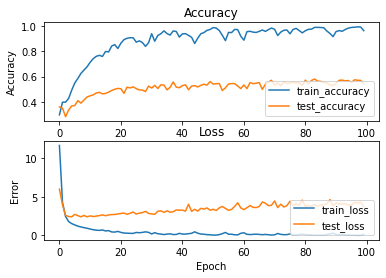

In [13]:
plotMod(mod)

# MLP without overfitting

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3367)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1724416   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

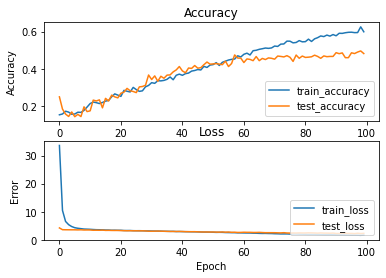

In [14]:
model_with_regularization=keras.Sequential([
    #input layers
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    #takes a multidimensial array and flattens it
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation="softmax"),
    
])

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model_with_regularization.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_with_regularization.summary()
mod=model_with_regularization.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=100,batch_size=32)
plotMod(mod)

# CNN

In [10]:
def build_model(input_shape):
    model=keras.Sequential()
    #layer1
    model.add(keras.layers.Conv2D(32 #kernels
                                  ,(3,3),
                                 activation='relu',input_shape=input_shape)),
    
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    #layer2
    model.add(keras.layers.Conv2D(32 #kernels
                                  ,(3,3),
                                 activation='relu',input_shape=input_shape)),
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    #layer3
    
    model.add(keras.layers.Conv2D(32 #kernels
                                  ,(2,2),
                                 activation='relu',input_shape=input_shape)),
    model.add(keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model
    
    

# Necessary functions

In [36]:
def prepData(testsize,validationsize):
    X,y=load(json_path) #loading data
    print(X.shape)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= testsize)
    
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validationsize)
    
    X_train=X_train[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    print(X_test.shape)
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [9]:
def load(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    inputs=np.array(data["mfcc"]) 
    targets=np.array(data["labels"]) 
    return inputs,targets


inputs,targets= load(json_path)

In [27]:
def loadgenre(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    genres=np.array(data["mapping"]) 
    return genres

In [19]:
X_train,X_validation,X_test,y_train,y_validation,y_test=prepData(0.35,0.3)
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
#building cnn
model=build_model(input_shape)
#compiling
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",metrics=['accuracy'])

#train
mod=model.fit(X_train,y_train, validation_data=(X_validation,y_validation),batch_size=32,epochs=100)
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy is {}".format(test_accuracy))
print("Error is {}".format(test_error))

Epoch 1/100
71/71 [==============================] - 10s 116ms/step - loss: 2.9745 - accuracy: 0.1487 - val_loss: 2.4261 - val_accuracy: 0.1663
Epoch 2/100
71/71 [==============================] - 8s 107ms/step - loss: 2.2495 - accuracy: 0.3074 - val_loss: 1.9601 - val_accuracy: 0.3542
Epoch 3/100
71/71 [==============================] - 8s 106ms/step - loss: 2.0007 - accuracy: 0.3422 - val_loss: 1.7816 - val_accuracy: 0.3994
Epoch 4/100
71/71 [==============================] - 8s 106ms/step - loss: 1.7844 - accuracy: 0.3972 - val_loss: 1.6571 - val_accuracy: 0.4302
Epoch 5/100
71/71 [==============================] - 8s 108ms/step - loss: 1.7488 - accuracy: 0.4375 - val_loss: 1.6085 - val_accuracy: 0.4507
Epoch 6/100
71/71 [==============================] - 8s 107ms/step - loss: 1.5956 - accuracy: 0.4778 - val_loss: 1.5552 - val_accuracy: 0.4743
Epoch 7/100
71/71 [==============================] - 8s 107ms/step - loss: 1.5130 - accuracy: 0.4982 - val_loss: 1.4878 - val_accuracy: 0.492

Epoch 58/100
71/71 [==============================] - 8s 107ms/step - loss: 0.3600 - accuracy: 0.9356 - val_loss: 1.1288 - val_accuracy: 0.6489
Epoch 59/100
71/71 [==============================] - 8s 107ms/step - loss: 0.3270 - accuracy: 0.9513 - val_loss: 1.0792 - val_accuracy: 0.6622
Epoch 60/100
71/71 [==============================] - 8s 106ms/step - loss: 0.3172 - accuracy: 0.9528 - val_loss: 1.1102 - val_accuracy: 0.6561
Epoch 61/100
71/71 [==============================] - 8s 106ms/step - loss: 0.3266 - accuracy: 0.9535 - val_loss: 1.1308 - val_accuracy: 0.6509
Epoch 62/100
71/71 [==============================] - 8s 106ms/step - loss: 0.3213 - accuracy: 0.9488 - val_loss: 1.1108 - val_accuracy: 0.6622
Epoch 63/100
71/71 [==============================] - 8s 106ms/step - loss: 0.3219 - accuracy: 0.9466 - val_loss: 1.1142 - val_accuracy: 0.6478
Epoch 64/100
71/71 [==============================] - 8s 106ms/step - loss: 0.2951 - accuracy: 0.9503 - val_loss: 1.1555 - val_accuracy:

In [22]:
model.history

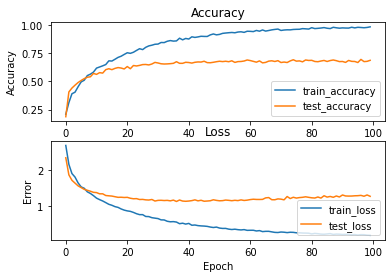

In [31]:
plotMod(mod)

# Prediction

In [24]:
def predict(model,X,y):
    X=X[np.newaxis,...]
    prediction=model.predict(X)
    predicted_index=np.argmax(prediction,axis=1)
    genres=loadgenre(json_path)
    print(genres)
    print("Expected index: {}, Outcome Index: {}".format(y,predicted_index))
    print("Expected genre: {}, Outcome genre: {}".format(genres[y],genres[predicted_index]))
    

In [23]:
X=X_test[100]
y=y_test[100]

In [28]:
predict(model,X,y)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Expected index: 7, Outcome Index: [7]
Expected genre: pop, Outcome genre: ['pop']


# CNN for INDIAN MUSIC GENRE


In [30]:
path="genrenew"
json_path="dataI.json"
sample_rate=22050
duration=45
samples_per_track= sample_rate * duration

def saveInd(path,json_path,n_mfcc=13,n_fft=2048,hop_length=512,num_segments=5):
    
    #build dictionary to store data
    data={
        "mapping":[], #this is the genre list
         "mfcc":[], #inputs
          "labels":[] #targets
    }
    
    num_samples_per_segment=int(samples_per_track/num_segments)
    expected_mfccv_per_segments=math.ceil(num_samples_per_segment/hop_length)
    
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(path)):
        if dirpath is not path: #check only when the dirpath is not equal to the root directory
        
            dirpathComps=dirpath.split("\\")
            semanticlabel=dirpathComps[-1]
            #this makes sure that if you get genre/blues it splits it and display "blues"
        
            data["mapping"].append(semanticlabel)
            #this appends the labels that you get into the mapping data 
            
            print("\nProcessing {}".format(semanticlabel))
            
            for f in filenames:
                file_path= os.path.join(dirpath,f)
                #this gets all the audio files in the directory
                signal,sr=librosa.load(file_path,sr=sample_rate)
                
                for s in range(num_segments):
                    
                    start=num_samples_per_segment * s
                    finish= start + num_samples_per_segment
                    
                    #for the song it divides it into the number of segments mentioned to increase dataset range
                    
                    
                    mfcc= librosa.feature.mfcc(signal[start:finish],sr=sr,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length)
                    mfcc=mfcc.T
                    #mfcc for each of these segments is calculated
                    
                    if len(mfcc) ==  expected_mfccv_per_segments:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        #labels and mfcc are saved into the data mao
                        print("{}, segment:{}".format(file_path, s))
                        
    with open(json_path,"w") as fp:
        json.dump(data,fp,indent=4)
        #this saves the data map into a json file
            

In [116]:
saveInd(path,json_path,num_segments=5)


Processing bollypop
genrenew\bollypop\00 - bollypop - bp01.wav, segment:0
genrenew\bollypop\00 - bollypop - bp01.wav, segment:1
genrenew\bollypop\00 - bollypop - bp01.wav, segment:2
genrenew\bollypop\00 - bollypop - bp01.wav, segment:3
genrenew\bollypop\00 - bollypop - bp01.wav, segment:4
genrenew\bollypop\00 - bollypop - bp02.wav, segment:0
genrenew\bollypop\00 - bollypop - bp02.wav, segment:1
genrenew\bollypop\00 - bollypop - bp02.wav, segment:2
genrenew\bollypop\00 - bollypop - bp02.wav, segment:3
genrenew\bollypop\00 - bollypop - bp02.wav, segment:4
genrenew\bollypop\00 - bollypop - bp03.wav, segment:0
genrenew\bollypop\00 - bollypop - bp03.wav, segment:1
genrenew\bollypop\00 - bollypop - bp03.wav, segment:2
genrenew\bollypop\00 - bollypop - bp03.wav, segment:3
genrenew\bollypop\00 - bollypop - bp03.wav, segment:4
genrenew\bollypop\00 - bollypop - bp04.wav, segment:0
genrenew\bollypop\00 - bollypop - bp04.wav, segment:1
genrenew\bollypop\00 - bollypop - bp04.wav, segment:2
genrene

genrenew\bollypop\00 - bollypop - bp30.wav, segment:4
genrenew\bollypop\00 - bollypop - bp31.wav, segment:0
genrenew\bollypop\00 - bollypop - bp31.wav, segment:1
genrenew\bollypop\00 - bollypop - bp31.wav, segment:2
genrenew\bollypop\00 - bollypop - bp31.wav, segment:3
genrenew\bollypop\00 - bollypop - bp31.wav, segment:4
genrenew\bollypop\00 - bollypop - bp32.wav, segment:0
genrenew\bollypop\00 - bollypop - bp32.wav, segment:1
genrenew\bollypop\00 - bollypop - bp32.wav, segment:2
genrenew\bollypop\00 - bollypop - bp32.wav, segment:3
genrenew\bollypop\00 - bollypop - bp32.wav, segment:4
genrenew\bollypop\00 - bollypop - bp33.wav, segment:0
genrenew\bollypop\00 - bollypop - bp33.wav, segment:1
genrenew\bollypop\00 - bollypop - bp33.wav, segment:2
genrenew\bollypop\00 - bollypop - bp33.wav, segment:3
genrenew\bollypop\00 - bollypop - bp33.wav, segment:4
genrenew\bollypop\00 - bollypop - bp34.wav, segment:0
genrenew\bollypop\00 - bollypop - bp34.wav, segment:1
genrenew\bollypop\00 - bolly

genrenew\bollypop\00 - bollypop - bp61.wav, segment:4
genrenew\bollypop\00 - bollypop - bp62.wav, segment:0
genrenew\bollypop\00 - bollypop - bp62.wav, segment:1
genrenew\bollypop\00 - bollypop - bp62.wav, segment:2
genrenew\bollypop\00 - bollypop - bp62.wav, segment:3
genrenew\bollypop\00 - bollypop - bp62.wav, segment:4
genrenew\bollypop\00 - bollypop - bp63.wav, segment:0
genrenew\bollypop\00 - bollypop - bp63.wav, segment:1
genrenew\bollypop\00 - bollypop - bp63.wav, segment:2
genrenew\bollypop\00 - bollypop - bp63.wav, segment:3
genrenew\bollypop\00 - bollypop - bp63.wav, segment:4
genrenew\bollypop\00 - bollypop - bp64.wav, segment:0
genrenew\bollypop\00 - bollypop - bp64.wav, segment:1
genrenew\bollypop\00 - bollypop - bp64.wav, segment:2
genrenew\bollypop\00 - bollypop - bp64.wav, segment:3
genrenew\bollypop\00 - bollypop - bp64.wav, segment:4
genrenew\bollypop\00 - bollypop - bp65.wav, segment:0
genrenew\bollypop\00 - bollypop - bp65.wav, segment:1
genrenew\bollypop\00 - bolly

genrenew\bollypop\00 - bollypop - bp93.wav, segment:0
genrenew\bollypop\00 - bollypop - bp93.wav, segment:1
genrenew\bollypop\00 - bollypop - bp93.wav, segment:2
genrenew\bollypop\00 - bollypop - bp93.wav, segment:3
genrenew\bollypop\00 - bollypop - bp93.wav, segment:4
genrenew\bollypop\00 - bollypop - bp94.wav, segment:0
genrenew\bollypop\00 - bollypop - bp94.wav, segment:1
genrenew\bollypop\00 - bollypop - bp94.wav, segment:2
genrenew\bollypop\00 - bollypop - bp94.wav, segment:3
genrenew\bollypop\00 - bollypop - bp94.wav, segment:4
genrenew\bollypop\00 - bollypop - bp95.wav, segment:0
genrenew\bollypop\00 - bollypop - bp95.wav, segment:1
genrenew\bollypop\00 - bollypop - bp95.wav, segment:2
genrenew\bollypop\00 - bollypop - bp95.wav, segment:3
genrenew\bollypop\00 - bollypop - bp95.wav, segment:4
genrenew\bollypop\00 - bollypop - bp96.wav, segment:0
genrenew\bollypop\00 - bollypop - bp96.wav, segment:1
genrenew\bollypop\00 - bollypop - bp96.wav, segment:2
genrenew\bollypop\00 - bolly

genrenew\carnatic\00 - carnatic - ca24.wav, segment:0
genrenew\carnatic\00 - carnatic - ca24.wav, segment:1
genrenew\carnatic\00 - carnatic - ca24.wav, segment:2
genrenew\carnatic\00 - carnatic - ca24.wav, segment:3
genrenew\carnatic\00 - carnatic - ca24.wav, segment:4
genrenew\carnatic\00 - carnatic - ca25.wav, segment:0
genrenew\carnatic\00 - carnatic - ca25.wav, segment:1
genrenew\carnatic\00 - carnatic - ca25.wav, segment:2
genrenew\carnatic\00 - carnatic - ca25.wav, segment:3
genrenew\carnatic\00 - carnatic - ca25.wav, segment:4
genrenew\carnatic\00 - carnatic - ca26.wav, segment:0
genrenew\carnatic\00 - carnatic - ca26.wav, segment:1
genrenew\carnatic\00 - carnatic - ca26.wav, segment:2
genrenew\carnatic\00 - carnatic - ca26.wav, segment:3
genrenew\carnatic\00 - carnatic - ca26.wav, segment:4
genrenew\carnatic\00 - carnatic - ca27.wav, segment:0
genrenew\carnatic\00 - carnatic - ca27.wav, segment:1
genrenew\carnatic\00 - carnatic - ca27.wav, segment:2
genrenew\carnatic\00 - carna

genrenew\carnatic\00 - carnatic - ca55.wav, segment:0
genrenew\carnatic\00 - carnatic - ca55.wav, segment:1
genrenew\carnatic\00 - carnatic - ca55.wav, segment:2
genrenew\carnatic\00 - carnatic - ca55.wav, segment:3
genrenew\carnatic\00 - carnatic - ca55.wav, segment:4
genrenew\carnatic\00 - carnatic - ca56.wav, segment:0
genrenew\carnatic\00 - carnatic - ca56.wav, segment:1
genrenew\carnatic\00 - carnatic - ca56.wav, segment:2
genrenew\carnatic\00 - carnatic - ca56.wav, segment:3
genrenew\carnatic\00 - carnatic - ca56.wav, segment:4
genrenew\carnatic\00 - carnatic - ca57.wav, segment:0
genrenew\carnatic\00 - carnatic - ca57.wav, segment:1
genrenew\carnatic\00 - carnatic - ca57.wav, segment:2
genrenew\carnatic\00 - carnatic - ca57.wav, segment:3
genrenew\carnatic\00 - carnatic - ca57.wav, segment:4
genrenew\carnatic\00 - carnatic - ca58.wav, segment:0
genrenew\carnatic\00 - carnatic - ca58.wav, segment:1
genrenew\carnatic\00 - carnatic - ca58.wav, segment:2
genrenew\carnatic\00 - carna

genrenew\carnatic\00 - carnatic - ca85.wav, segment:4
genrenew\carnatic\00 - carnatic - ca86.wav, segment:0
genrenew\carnatic\00 - carnatic - ca86.wav, segment:1
genrenew\carnatic\00 - carnatic - ca86.wav, segment:2
genrenew\carnatic\00 - carnatic - ca86.wav, segment:3
genrenew\carnatic\00 - carnatic - ca86.wav, segment:4
genrenew\carnatic\00 - carnatic - ca87.wav, segment:0
genrenew\carnatic\00 - carnatic - ca87.wav, segment:1
genrenew\carnatic\00 - carnatic - ca87.wav, segment:2
genrenew\carnatic\00 - carnatic - ca87.wav, segment:3
genrenew\carnatic\00 - carnatic - ca87.wav, segment:4
genrenew\carnatic\00 - carnatic - ca88.wav, segment:0
genrenew\carnatic\00 - carnatic - ca88.wav, segment:1
genrenew\carnatic\00 - carnatic - ca88.wav, segment:2
genrenew\carnatic\00 - carnatic - ca88.wav, segment:3
genrenew\carnatic\00 - carnatic - ca88.wav, segment:4
genrenew\carnatic\00 - carnatic - ca89.wav, segment:0
genrenew\carnatic\00 - carnatic - ca89.wav, segment:1
genrenew\carnatic\00 - carna

genrenew\ghazal\00 - ghazal - gz18.wav, segment:0
genrenew\ghazal\00 - ghazal - gz18.wav, segment:1
genrenew\ghazal\00 - ghazal - gz18.wav, segment:2
genrenew\ghazal\00 - ghazal - gz18.wav, segment:3
genrenew\ghazal\00 - ghazal - gz18.wav, segment:4
genrenew\ghazal\00 - ghazal - gz19.wav, segment:0
genrenew\ghazal\00 - ghazal - gz19.wav, segment:1
genrenew\ghazal\00 - ghazal - gz19.wav, segment:2
genrenew\ghazal\00 - ghazal - gz19.wav, segment:3
genrenew\ghazal\00 - ghazal - gz19.wav, segment:4
genrenew\ghazal\00 - ghazal - gz20.wav, segment:0
genrenew\ghazal\00 - ghazal - gz20.wav, segment:1
genrenew\ghazal\00 - ghazal - gz20.wav, segment:2
genrenew\ghazal\00 - ghazal - gz20.wav, segment:3
genrenew\ghazal\00 - ghazal - gz20.wav, segment:4
genrenew\ghazal\00 - ghazal - gz21.wav, segment:0
genrenew\ghazal\00 - ghazal - gz21.wav, segment:1
genrenew\ghazal\00 - ghazal - gz21.wav, segment:2
genrenew\ghazal\00 - ghazal - gz21.wav, segment:3
genrenew\ghazal\00 - ghazal - gz21.wav, segment:4


genrenew\ghazal\00 - ghazal - gz51.wav, segment:0
genrenew\ghazal\00 - ghazal - gz51.wav, segment:1
genrenew\ghazal\00 - ghazal - gz51.wav, segment:2
genrenew\ghazal\00 - ghazal - gz51.wav, segment:3
genrenew\ghazal\00 - ghazal - gz51.wav, segment:4
genrenew\ghazal\00 - ghazal - gz52.wav, segment:0
genrenew\ghazal\00 - ghazal - gz52.wav, segment:1
genrenew\ghazal\00 - ghazal - gz52.wav, segment:2
genrenew\ghazal\00 - ghazal - gz52.wav, segment:3
genrenew\ghazal\00 - ghazal - gz52.wav, segment:4
genrenew\ghazal\00 - ghazal - gz53.wav, segment:0
genrenew\ghazal\00 - ghazal - gz53.wav, segment:1
genrenew\ghazal\00 - ghazal - gz53.wav, segment:2
genrenew\ghazal\00 - ghazal - gz53.wav, segment:3
genrenew\ghazal\00 - ghazal - gz53.wav, segment:4
genrenew\ghazal\00 - ghazal - gz54.wav, segment:0
genrenew\ghazal\00 - ghazal - gz54.wav, segment:1
genrenew\ghazal\00 - ghazal - gz54.wav, segment:2
genrenew\ghazal\00 - ghazal - gz54.wav, segment:3
genrenew\ghazal\00 - ghazal - gz54.wav, segment:4


genrenew\ghazal\00 - ghazal - gz84.wav, segment:0
genrenew\ghazal\00 - ghazal - gz84.wav, segment:1
genrenew\ghazal\00 - ghazal - gz84.wav, segment:2
genrenew\ghazal\00 - ghazal - gz84.wav, segment:3
genrenew\ghazal\00 - ghazal - gz84.wav, segment:4
genrenew\ghazal\00 - ghazal - gz85.wav, segment:0
genrenew\ghazal\00 - ghazal - gz85.wav, segment:1
genrenew\ghazal\00 - ghazal - gz85.wav, segment:2
genrenew\ghazal\00 - ghazal - gz85.wav, segment:3
genrenew\ghazal\00 - ghazal - gz85.wav, segment:4
genrenew\ghazal\00 - ghazal - gz86.wav, segment:0
genrenew\ghazal\00 - ghazal - gz86.wav, segment:1
genrenew\ghazal\00 - ghazal - gz86.wav, segment:2
genrenew\ghazal\00 - ghazal - gz86.wav, segment:3
genrenew\ghazal\00 - ghazal - gz86.wav, segment:4
genrenew\ghazal\00 - ghazal - gz87.wav, segment:0
genrenew\ghazal\00 - ghazal - gz87.wav, segment:1
genrenew\ghazal\00 - ghazal - gz87.wav, segment:2
genrenew\ghazal\00 - ghazal - gz87.wav, segment:3
genrenew\ghazal\00 - ghazal - gz87.wav, segment:4


genrenew\semiclassical\00 - semiclassical - scl13.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl13.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl13.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl13.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl13.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl14.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl14.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl14.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl14.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl14.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl15.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl15.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl15.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl15.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl15.wav, segment:4
genrenew\semiclassical\00

genrenew\semiclassical\00 - semiclassical - scl39.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl39.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl39.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl39.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl39.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl40.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl40.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl40.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl40.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl40.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl41.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl41.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl41.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl41.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl41.wav, segment:4
genrenew\semiclassical\00

genrenew\semiclassical\00 - semiclassical - scl65.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl65.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl65.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl65.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl65.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl66.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl66.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl66.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl66.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl66.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl67.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl67.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl67.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl67.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl67.wav, segment:4
genrenew\semiclassical\00

genrenew\semiclassical\00 - semiclassical - scl91.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl91.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl91.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl91.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl91.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl92.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl92.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl92.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl92.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl92.wav, segment:4
genrenew\semiclassical\00 - semiclassical - scl93.wav, segment:0
genrenew\semiclassical\00 - semiclassical - scl93.wav, segment:1
genrenew\semiclassical\00 - semiclassical - scl93.wav, segment:2
genrenew\semiclassical\00 - semiclassical - scl93.wav, segment:3
genrenew\semiclassical\00 - semiclassical - scl93.wav, segment:4
genrenew\semiclassical\00

genrenew\sufi\00 - sufi - su23.wav, segment:0
genrenew\sufi\00 - sufi - su23.wav, segment:1
genrenew\sufi\00 - sufi - su23.wav, segment:2
genrenew\sufi\00 - sufi - su23.wav, segment:3
genrenew\sufi\00 - sufi - su23.wav, segment:4
genrenew\sufi\00 - sufi - su24.wav, segment:0
genrenew\sufi\00 - sufi - su24.wav, segment:1
genrenew\sufi\00 - sufi - su24.wav, segment:2
genrenew\sufi\00 - sufi - su24.wav, segment:3
genrenew\sufi\00 - sufi - su24.wav, segment:4
genrenew\sufi\00 - sufi - su25.wav, segment:0
genrenew\sufi\00 - sufi - su25.wav, segment:1
genrenew\sufi\00 - sufi - su25.wav, segment:2
genrenew\sufi\00 - sufi - su25.wav, segment:3
genrenew\sufi\00 - sufi - su25.wav, segment:4
genrenew\sufi\00 - sufi - su26.wav, segment:0
genrenew\sufi\00 - sufi - su26.wav, segment:1
genrenew\sufi\00 - sufi - su26.wav, segment:2
genrenew\sufi\00 - sufi - su26.wav, segment:3
genrenew\sufi\00 - sufi - su26.wav, segment:4
genrenew\sufi\00 - sufi - su27.wav, segment:0
genrenew\sufi\00 - sufi - su27.wav

genrenew\sufi\00 - sufi - su59.wav, segment:0
genrenew\sufi\00 - sufi - su59.wav, segment:1
genrenew\sufi\00 - sufi - su59.wav, segment:2
genrenew\sufi\00 - sufi - su59.wav, segment:3
genrenew\sufi\00 - sufi - su59.wav, segment:4
genrenew\sufi\00 - sufi - su60.wav, segment:0
genrenew\sufi\00 - sufi - su60.wav, segment:1
genrenew\sufi\00 - sufi - su60.wav, segment:2
genrenew\sufi\00 - sufi - su60.wav, segment:3
genrenew\sufi\00 - sufi - su60.wav, segment:4
genrenew\sufi\00 - sufi - su61.wav, segment:0
genrenew\sufi\00 - sufi - su61.wav, segment:1
genrenew\sufi\00 - sufi - su61.wav, segment:2
genrenew\sufi\00 - sufi - su61.wav, segment:3
genrenew\sufi\00 - sufi - su61.wav, segment:4
genrenew\sufi\00 - sufi - su62.wav, segment:0
genrenew\sufi\00 - sufi - su62.wav, segment:1
genrenew\sufi\00 - sufi - su62.wav, segment:2
genrenew\sufi\00 - sufi - su62.wav, segment:3
genrenew\sufi\00 - sufi - su62.wav, segment:4
genrenew\sufi\00 - sufi - su63.wav, segment:0
genrenew\sufi\00 - sufi - su63.wav

genrenew\sufi\00 - sufi - su95.wav, segment:0
genrenew\sufi\00 - sufi - su95.wav, segment:1
genrenew\sufi\00 - sufi - su95.wav, segment:2
genrenew\sufi\00 - sufi - su95.wav, segment:3
genrenew\sufi\00 - sufi - su95.wav, segment:4
genrenew\sufi\00 - sufi - su96.wav, segment:0
genrenew\sufi\00 - sufi - su96.wav, segment:1
genrenew\sufi\00 - sufi - su96.wav, segment:2
genrenew\sufi\00 - sufi - su96.wav, segment:3
genrenew\sufi\00 - sufi - su96.wav, segment:4
genrenew\sufi\00 - sufi - su97.wav, segment:0
genrenew\sufi\00 - sufi - su97.wav, segment:1
genrenew\sufi\00 - sufi - su97.wav, segment:2
genrenew\sufi\00 - sufi - su97.wav, segment:3
genrenew\sufi\00 - sufi - su97.wav, segment:4
genrenew\sufi\00 - sufi - su98.wav, segment:0
genrenew\sufi\00 - sufi - su98.wav, segment:1
genrenew\sufi\00 - sufi - su98.wav, segment:2
genrenew\sufi\00 - sufi - su98.wav, segment:3
genrenew\sufi\00 - sufi - su98.wav, segment:4
genrenew\sufi\00 - sufi - su99.wav, segment:0
genrenew\sufi\00 - sufi - su99.wav

# Necessary functions

In [33]:
def load(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    inputs=np.array(data["mfcc"]) 
    targets=np.array(data["labels"]) 
    return inputs,targets

def loadgenre(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    genres=np.array(data["mapping"]) 
    return genres

def prepData(testsize,validationsize):
    X,y=load(json_path) #loading data
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= testsize)
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validationsize)
    X_train=X_train[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    print(X_test.shape)
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [34]:
X_train,X_validation,X_test,y_train,y_validation,y_test=prepData(0.35,0.3)

(874, 388, 13, 1)


In [39]:
X_train,X_validation,X_test,y_train,y_validation,y_test=prepData(0.35,0.3)
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
#building cnn
model=build_model(input_shape)
#compiling
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",metrics=['accuracy'])

#train
mod=model.fit(X_train,y_train, validation_data=(X_validation,y_validation),batch_size=32,epochs=100)
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy is {}".format(test_accuracy))
print("Error is {}".format(test_error))

(874, 388, 13, 1)
Epoch 1/100
36/36 [==============================] - 8s 164ms/step - loss: 2.8481 - accuracy: 0.1547 - val_loss: 2.5527 - val_accuracy: 0.2053
Epoch 2/100
36/36 [==============================] - 5s 149ms/step - loss: 2.0128 - accuracy: 0.3780 - val_loss: 2.4633 - val_accuracy: 0.2628
Epoch 3/100
36/36 [==============================] - 6s 154ms/step - loss: 1.6494 - accuracy: 0.4992 - val_loss: 2.1995 - val_accuracy: 0.3183
Epoch 4/100
36/36 [==============================] - 5s 149ms/step - loss: 1.5013 - accuracy: 0.5145 - val_loss: 1.8757 - val_accuracy: 0.4025
Epoch 5/100
36/36 [==============================] - 5s 150ms/step - loss: 1.3186 - accuracy: 0.5917 - val_loss: 1.6237 - val_accuracy: 0.5031
Epoch 6/100
36/36 [==============================] - 5s 151ms/step - loss: 1.1980 - accuracy: 0.6418 - val_loss: 1.4984 - val_accuracy: 0.5441
Epoch 7/100
36/36 [==============================] - 5s 151ms/step - loss: 1.0972 - accuracy: 0.6644 - val_loss: 1.3957 - va

Epoch 58/100
36/36 [==============================] - 6s 170ms/step - loss: 0.1956 - accuracy: 0.9901 - val_loss: 1.1506 - val_accuracy: 0.6776
Epoch 59/100
36/36 [==============================] - 6s 176ms/step - loss: 0.1901 - accuracy: 0.9866 - val_loss: 1.1640 - val_accuracy: 0.6756
Epoch 60/100
36/36 [==============================] - 6s 167ms/step - loss: 0.1995 - accuracy: 0.9815 - val_loss: 1.1738 - val_accuracy: 0.6797
Epoch 61/100
36/36 [==============================] - 6s 167ms/step - loss: 0.1829 - accuracy: 0.9956 - val_loss: 1.2196 - val_accuracy: 0.6838
Epoch 62/100
36/36 [==============================] - 6s 162ms/step - loss: 0.1827 - accuracy: 0.9918 - val_loss: 1.2005 - val_accuracy: 0.6715
Epoch 63/100
36/36 [==============================] - 6s 171ms/step - loss: 0.2009 - accuracy: 0.9892 - val_loss: 1.2147 - val_accuracy: 0.6817
Epoch 64/100
36/36 [==============================] - 6s 167ms/step - loss: 0.1793 - accuracy: 0.9942 - val_loss: 1.1919 - val_accuracy:

In [43]:
X=X_test[50]
y=y_test[50]

In [44]:
predict(model,X,y)

['bollypop' 'carnatic' 'ghazal' 'semiclassical' 'sufi']
Expected index: 2, Outcome Index: [2]
Expected genre: ghazal, Outcome genre: ['ghazal']
